## Warmup Exercise for multiple Regression

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf

## Beer & Chips

### Generating Model I

$$
\begin{aligned}
\text{Headache}  &= 0.5 \cdot \text{Beers} +   0.1 \cdot \text{Chips} + \text{otherFactors} \\
y_i &= \beta_0 + \beta_1 \cdot x_{i,1} + \beta_2 \cdot x_{i,2}+ u_i
\end{aligned}
$$

-----------------------

$$
\begin{aligned}
\text{Beers}_i & \sim \text{Pois}(3)/2 \\
\text{Chips}_i &= 15 \cdot \text{Beers}_i + v_i  \\
u_i & \sim N(0,0.5), v_i \sim N(0,2.5)
\end{aligned}
$$

1. Fit the following two simple linear regressions (Try both sklearn and statsmodels)
    * $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_{i,1}$
    * $\hat{y_i} = \hat{\beta}_0  + \hat{\beta}_2 \cdot x_{i,2}$
   
2. Think about what happens when you set the variations to zero, one by one respectively: $u_i \sim N(0,0), v_i \sim N(0,0)$

3. Fit a multiple linear regression model and compare the coefficients:
    * $\hat{y_i} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_{i,1} + \hat{\beta}_2 \cdot x_{i,2}$

In [3]:
#get used to generating random numbers from different distributions:

from scipy.stats import poisson
from scipy.stats import norm


norm.rvs(scale=2,size=10)
poisson.rvs(2, size=10)

array([1, 2, 1, 4, 2, 1, 1, 2, 1, 4])

In [9]:
N=100
np.random.seed(123)
NumBeers = poisson.rvs(3, size=N)/2

v = norm.rvs(scale=2.5,size=N)
NumChips = 15*NumBeers + v
NumChips[NumChips<0] = 0

u=norm.rvs(scale=0.5,size=N)
Headache = 0.5*NumBeers + 0.1*NumChips  + u
Headache[Headache<0] = 0

BeerChips_df = pd.DataFrame({'Beers':NumBeers, 'Chips':NumChips, 'Headache':Headache})



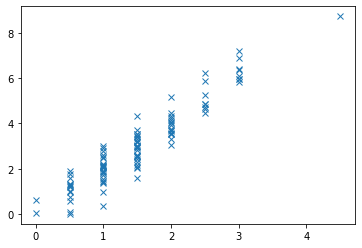

In [10]:
plt.plot(NumBeers, Headache, "x");

### Generating Model II

$$
\begin{aligned}
\text{Headache}  &= 0.5 \cdot \text{Beers} +   0.1 \cdot \text{Chips} + 0.05 \cdot  \text{Interaction(Chips,Beers)} + \text{otherFactors} \\
y_i &= \beta_0 + \beta_1 \cdot x_{i,1} + \beta_2 \cdot x_{i,2} + \beta_3 \cdot x_{i,1} \cdot x_{i,2} + u_i
\end{aligned}
$$

### Generating Model III

$$
\begin{aligned}
\text{Headache}  &= 0.1 \cdot \text{Beers}^2 +   0.01 \cdot \text{Chips}^2 + 0.05 \cdot  \text{Interaction(Chips,Beers)} + \text{otherFactors} \\
y_i &= \beta_0 + \beta_1 \cdot x_{i,1}^2 + \beta_2 \cdot x_{i,2}^2 + \beta_3 \cdot x_{i,1} \cdot x_{i,2} + u_i
\end{aligned}
$$
